<a href="https://colab.research.google.com/github/kameldeeb/Data-Analysis/blob/main/life_expectancy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Health & Economy: Exploratory Data Analysis on Life Expectancy and Development Indicators

**Student Name:** Kamel Deeb  
**Student ID**: Kamel_348202  
**University:** Syrian Virtual University  
**Program:** Master in Web Science (MWS)  
**Course:** Web Data Analysis  
**Supervisor:** Dr. Basel Al-Khatib  
**Project Title:** Life Data Analysis  
**Dataset Source:** [Kaggle Dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancywho)

## 🧠 Objective

The aim of this project is to explore global life expectancy patterns and analyze how socio-economic factors (such as GDP, schooling, alcohol consumption, etc.) relate to health outcomes across countries.

We will:
- Clean and preprocess the dataset.
- Perform descriptive and inferential analysis.
- Visualize health and economic trends.
- Answer a set of predefined research questions using Python.

## 📦 Dataset Description

The dataset includes data from the World Health Organization (WHO) and World Bank, covering:
- Life expectancy
- Economic indicators (GDP, schooling, expenditure)
- Health metrics (BMI, alcohol, HIV/AIDS, immunization, etc.)
- Country and year identifiers


In [42]:
import kagglehub

path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/life-expectancy-who


> ✅ The dataset was downloaded using the `kagglehub` library.  
> It includes a CSV file with data for multiple countries over several years, containing demographic, economic, and health indicators.


## 1. Data Cleaning

Before beginning any analysis, it is essential to clean the dataset to ensure accuracy and reliability in our results.  
This includes checking for missing values, standardizing column names, handling null values using appropriate methods, and correcting data types.

The cleaning process below prepares the dataset for the analytical questions that follow.


In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv(path + "/Life Expectancy Data.csv")

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

### Q1. Report Missing Values

We calculated both the count and percentage of missing values for each column. This helps identify columns that require cleaning or removal.


In [44]:
missing_counts = df.isnull().sum()
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage.round(2).astype(str) + '%'

missing_report = pd.DataFrame({
    'Missing Counts': missing_counts,
    'Missing Percentage': missing_percentage
})

print(missing_report)



                                 Missing Counts Missing Percentage
Country                                       0               0.0%
Year                                          0               0.0%
Status                                        0               0.0%
Life expectancy                              10              0.34%
Adult Mortality                              10              0.34%
infant deaths                                 0               0.0%
Alcohol                                     194               6.6%
percentage expenditure                        0               0.0%
Hepatitis B                                 553             18.82%
Measles                                       0               0.0%
BMI                                          34              1.16%
under-five deaths                             0               0.0%
Polio                                        19              0.65%
Total expenditure                           226              7


### Q2. Handle Missing Values in Key Columns

Missing values in the 'BMI', 'Schooling', and 'GDP' columns were filled using the **mean per country**. This approach maintains contextual accuracy rather than filling with a global mean.

In [45]:
columns_to_fill = ['BMI', 'Schooling', 'GDP']
for column in columns_to_fill:
    df[column] = df.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))

print(df[columns_to_fill].isnull().sum())



BMI           34
Schooling    163
GDP          405
dtype: int64



### Q3. Drop Columns with >20% Missing Data

Columns with more than 20% missing values were dropped, as retaining them could introduce significant bias or reduce data quality.  
This threshold was chosen to balance information retention with data reliability.

In [46]:
# df = pd.read_csv(path + "/Life Expectancy Data.csv")
before= df.columns

missing_counts = df.isnull().sum()
total_rows = len(df)
missing_percentage = (missing_counts / total_rows) * 100

columns_to_drop = missing_percentage[missing_percentage > 20].index
df = df.drop(columns=columns_to_drop)

after= df.columns

print("Columns dropped:", set(before) - set(after))

Columns dropped: {'Population'}


### Q4. Fix Data Types

The 'Year' column was converted to `datetime` format to enable time-based grouping and plotting in later analysis.  
We also removed extra spaces from column names to ensure consistent referencing across all code cells.


In [47]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

print(df.dtypes)

Country                                    object
Year                               datetime64[ns]
Status                                     object
Life expectancy                           float64
Adult Mortality                           float64
infant deaths                               int64
Alcohol                                   float64
percentage expenditure                    float64
Hepatitis B                               float64
Measles                                     int64
BMI                                       float64
under-five deaths                           int64
Polio                                     float64
Total expenditure                         float64
Diphtheria                                float64
HIV/AIDS                                  float64
GDP                                       float64
thinness  1-19 years                      float64
thinness 5-9 years                        float64
Income composition of resources           float64


> ✅ The dataset is now clean and ready for structured analysis in the following sections.


## 2. Descriptive Statistics

In this section, we explore and summarize key numerical indicators in the dataset.  
Descriptive statistics provide a high-level understanding of the data distribution, trends across countries and regions, and variations based on development status.


### Q5. What is the average life expectancy globally, by continent, and by development status?

We used three levels of grouping to analyze life expectancy:

- **Global average**: Simple mean of the entire `Life expectancy` column.
- **By development status**: Grouping by the `Status` column (Developed vs Developing).
- **By continent**: Since the dataset lacked a 'Continent' column, we created one by mapping each country to its continent using the `pycountry_convert` library.

> ✅ Missing values were already handled in the cleaning step to ensure correct means.



In [48]:
# Global average
global_avg = df['Life expectancy'].mean()
print(f"Average global life expectancy: {global_avg:.2f} years")

# By development status
avg_by_status = df.groupby('Status')['Life expectancy'].mean()
print("Average life expectancy by development status:")
print(avg_by_status)


Average global life expectancy: 69.22 years
Average life expectancy by development status:
Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy, dtype: float64


> To analyze global life expectancy by continent, we needed to add a new column called Continent, since the original dataset did not include this information. We used the **pycountry_convert** library to map each country's name to its corresponding continent.


In [49]:

!pip install pycountry_convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 22.7 MB/s eta 0:00:00


In [50]:
# Map country to continent
import pycountry_convert as pc

def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

df['Continent'] = df['Country'].apply(get_continent)

avg_by_continent = df.groupby('Continent')['Life expectancy'].mean()
print("Average life expectancy by continent:")
print(avg_by_continent)


Average life expectancy by continent:
Continent
Africa           58.611921
Asia             71.069318
Europe           77.518257
North America    73.778869
Oceania          71.549306
South America    73.456875
Unknown          71.786607
Name: Life expectancy, dtype: float64


### Q6. What are the min, max, and mean values for Alcohol consumption, BMI, and GDP?

To understand the overall distribution and scale of key indicators, we computed basic summary statistics for the following numeric columns:

- **Alcohol**: Estimated alcohol consumption per adult (liters/year).
- **BMI**: Average Body Mass Index (BMI) in the population.
- **GDP**: Gross Domestic Product per capita (in USD).

We applied the `.agg()` function to calculate the **minimum**, **maximum**, and **mean** values for each column.  
Any rows with missing values in these columns were excluded to avoid distortion in the results.


In [51]:
columns_of_interest = ['Alcohol', 'BMI', 'GDP']
df_stats = df[columns_of_interest].dropna()

summary_stats = df_stats.agg(['min', 'max', 'mean'])
print(summary_stats)


       Alcohol        BMI            GDP
min    0.01000   1.400000       1.681350
max   17.87000  87.300000  119172.741800
mean   4.54115  38.045869    7498.639369


### Q7. Country-wise Summary of Health, Economy, and Education

We created a country-level summary table that aggregates:

- **Mean life expectancy**
- **Average GDP**
- **Average years of schooling**

This summary helps compare countries in terms of overall development from a health, economic, and educational perspective.  
We first selected the necessary columns and dropped any rows with missing values to ensure accurate aggregation.


In [52]:
columns_needed = ['Country', 'Life expectancy', 'GDP', 'Schooling']
df_cleaned = df[columns_needed].dropna()

summary_by_country = df_cleaned.groupby('Country').agg({
    'Life expectancy': 'mean',
    'GDP': 'mean',
    'Schooling': 'mean'
}).reset_index()

summary_by_country.columns = ['Country', 'Avg_Life_Expectancy', 'Avg_GDP', 'Avg_Schooling']
summary_by_country.head(10)


,Country,Avg_Life_Expectancy,Avg_GDP,Avg_Schooling
0,Afghanistan,58.19375,340.015425,8.21250
1,Albania,75.15625,2119.726679,12.13750
2,Algeria,73.61875,2847.853392,12.71250
3,Angola,49.01875,1975.143045,8.04375
4,Antigua and Barbuda,75.05625,9759.305728,8.84375
5,Argentina,75.15625,6998.575103,16.50625
6,Armenia,73.40000,1999.986318,11.78750
7,Australia,81.81250,34637.565047,20.03750
8,Austria,81.48125,33827.476309,15.38750
9,Azerbaijan,70.73125,3302.947807,11.35000


## 3. Data Grouping and Queries

This section focuses on grouping data by country and year to identify long-term trends in life expectancy and related indicators.  
By aggregating over time and across countries, we can highlight key changes in global health patterns, economic growth, and their interrelations.

### Q8. Average Life Expectancy per Country

To compare general health levels across countries:

- We grouped the dataset by **Country**.
- Calculated the **mean of life expectancy** for each country.

This provides a basic ranking of countries based on average life expectancy across all recorded years in the dataset.


In [53]:
df_life = df[['Country', 'Life expectancy']].dropna()

avg_life_by_country = df_life.groupby('Country')['Life expectancy'].mean().reset_index()
avg_life_by_country.columns = ['Country', 'Avg_Life_Expectancy']

avg_life_by_country.head(10)


,Country,Avg_Life_Expectancy
0,Afghanistan,58.19375
1,Albania,75.15625
2,Algeria,73.61875
3,Angola,49.01875
4,Antigua and Barbuda,75.05625
5,Argentina,75.15625
6,Armenia,73.40000
7,Australia,81.81250
8,Austria,81.48125
9,Azerbaijan,70.73125


### Q9. Global Trends in Life Expectancy and GDP Over Time

To observe long-term development patterns:

- We grouped the dataset by **Year**.
- Computed the **average life expectancy** and **average GDP** globally for each year.
- This allows us to analyze whether economic improvements are accompanied by better health outcomes over time.

> These metrics will be useful later for plotting trends across time using line plots.


In [54]:
df_yearly = df[['Year', 'Life expectancy', 'GDP']].dropna()

global_trends = df_yearly.groupby('Year').agg({
    'Life expectancy': 'mean',
    'GDP': 'mean'
}).reset_index()

global_trends.columns = ['Year', 'Avg_Life_Expectancy', 'Avg_GDP']
global_trends.head()


,Year,Avg_Life_Expectancy,Avg_GDP
0,2000-01-01,66.718354,4625.409106
1,2001-01-01,67.121519,4793.569927
2,2002-01-01,67.383544,4543.191368
3,2003-01-01,67.427848,4715.391104
4,2004-01-01,67.648101,6975.370263


### Q10. Top 5 Countries with Highest Increase in Life Expectancy (2000–2015)

To identify which countries experienced the greatest improvement in life expectancy between 2000 and 2015, we performed the following:

- **Filtered** the dataset to include only the years 2000 and 2015.
- **Grouped** data by `Country` and calculated the **mean life expectancy** in each year.
- **Pivoted** the table to have years as columns (`2000` and `2015`).
- **Dropped** rows with missing values in either year to ensure valid comparisons.
- **Computed** the difference in life expectancy between 2015 and 2000.
- **Sorted** the results by the difference and selected the **top 5 countries** with the highest increase.

This approach highlights the most improved countries over a 15-year span.


In [57]:
# Filter for years 2000 and 2015
df_filtered = df[df['Year'].isin([pd.to_datetime('2000-01-01'), pd.to_datetime('2015-01-01')])][['Country', 'Year', 'Life expectancy']].dropna()

# Use pivot_table for robustness
pivot_df = pd.pivot_table(
    df_filtered,
    values='Life expectancy',
    index='Country',
    columns='Year',
    aggfunc='mean'
)

# Drop missing
pivot_df = pivot_df.dropna(subset=[pd.to_datetime('2000-01-01'), pd.to_datetime('2015-01-01')])

# Compute increase
pivot_df['Increase'] = pivot_df[pd.to_datetime('2015-01-01')] - pivot_df[pd.to_datetime('2000-01-01')]

# Sort and get top 5
top_5_increase = pivot_df.sort_values(by='Increase', ascending=False).head(5)

print(top_5_increase)

Year      2000-01-01 00:00:00  2015-01-01 00:00:00  Increase
Country                                                     
Zimbabwe                 46.0                 67.0      21.0
Eritrea                  45.3                 64.7      19.4
Zambia                   43.8                 61.8      18.0
Botswana                 47.8                 65.7      17.9
Rwanda                   48.3                 66.1      17.8


### Q11. Countries with HIV/AIDS Mortality > 10 and Life Expectancy < 60

To assess how HIV/AIDS affects population health, we filtered the dataset to identify countries where:

- The **HIV/AIDS mortality rate** is greater than 10.
- The **life expectancy** is less than 60 years.

This highlights populations facing both high disease burden and reduced longevity, helping identify countries that may need urgent health interventions.



In [58]:
vulnerable_countries = df[
    (df['HIV/AIDS'] > 10) & (df['Life expectancy'] < 60)
]['Country'].dropna().unique()

print("Countries with HIV/AIDS mortality > 10 and life expectancy < 60:")
for country in vulnerable_countries:
    print(country)


Countries with HIV/AIDS mortality > 10 and life expectancy < 60:
Botswana
Central African Republic
Gabon
Kenya
Lesotho
Malawi
Mozambique
Namibia
South Africa
Swaziland
Uganda
United Republic of Tanzania
Zambia
Zimbabwe


## 4. Visualization 1: Basic


### Q12. Histogram of Life Expectancy

We plotted a histogram to understand the distribution of **life expectancy** across the entire dataset.

- The number of bins was set to **20** for better granularity.
- This visualization provides a quick overview of how life expectancy is spread globally, and helps identify common and extreme values.


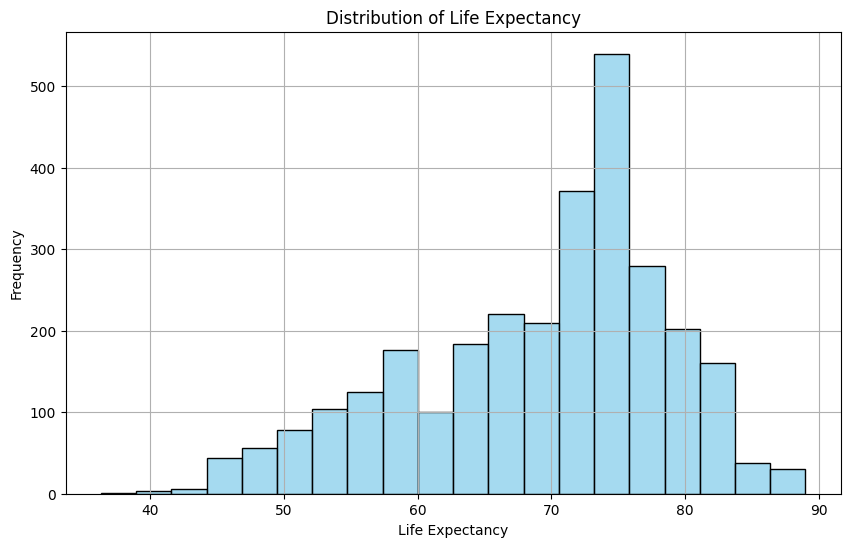

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

life_expectancy = df['Life expectancy'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Q13. Boxplot of Life Expectancy by Development Status

This visualization compares life expectancy between **Developed** and **Developing** countries.

- We used the `'Status'` column to group the data into two categories.
- A **boxplot** was generated to show the distribution of life expectancy in each group.
- This helps us examine disparities in health outcomes based on development status.


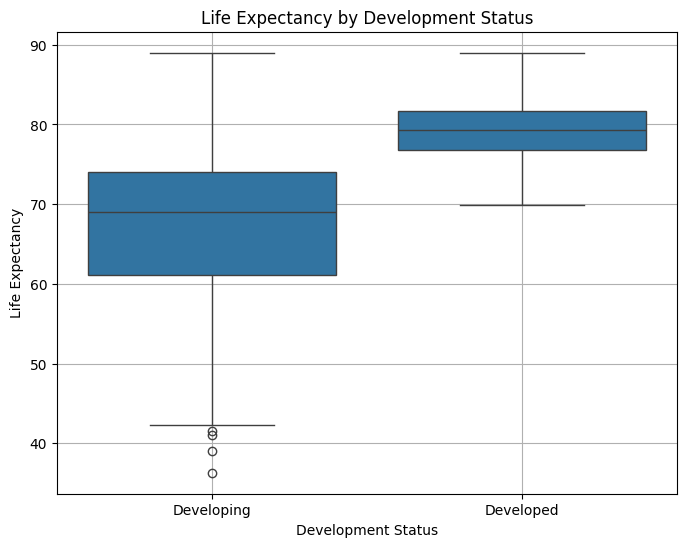

In [60]:
boxplot_data = df[['Status', 'Life expectancy']].dropna()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=boxplot_data)
plt.title('Life Expectancy by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


### Q14. Bar Plot of Average GDP for Top 10 Countries with Highest Life Expectancy

To investigate the relationship between national wealth and population health, we:

- Calculated the **mean life expectancy** and **average GDP** for each country.
- Identified the **top 10 countries** with the highest life expectancy.
- Visualized their **average GDP** using a horizontal bar plot.

This helps illustrate whether countries with longer-living populations also enjoy higher economic output per capita.



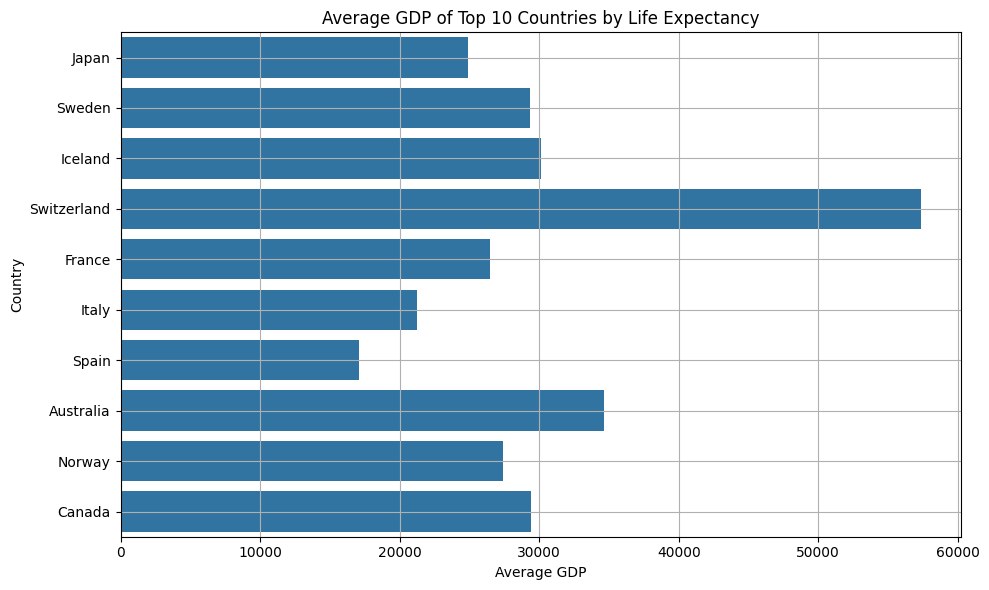

In [61]:
filtered_df = df[['Country', 'Life expectancy', 'GDP']].dropna()

country_avg = filtered_df.groupby('Country').agg({
    'Life expectancy': 'mean',
    'GDP': 'mean'
}).reset_index()

top_10 = country_avg.sort_values(by='Life expectancy', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='GDP', y='Country', data=top_10)
plt.title('Average GDP of Top 10 Countries by Life Expectancy')
plt.xlabel('Average GDP')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Visualization 2: Time Series & Trends


### Q15. Global Average Life Expectancy per Year

To track how global health has progressed over time, we analyzed the **average life expectancy per year**. The steps included:

- Ensuring the `Year` column is numeric.
- Dropping missing values in `Year` and `Life expectancy`.
- Grouping by year and computing the **global mean life expectancy**.
- Plotting the results using a line chart to visualize the trend.

This visualization reveals how life expectancy has evolved over the observed period, helping identify periods of improvement or stagnation.



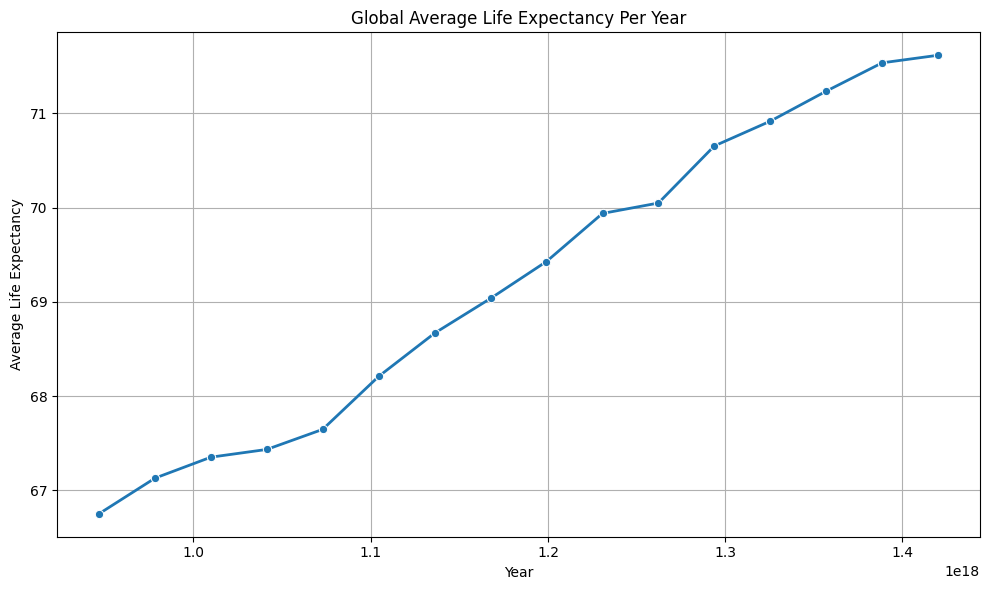

In [62]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

yearly_life = df[['Year', 'Life expectancy']].dropna()

avg_life_per_year = yearly_life.groupby('Year')['Life expectancy'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_life_per_year, x='Year', y='Life expectancy', marker='o', linewidth=2)
plt.title('Global Average Life Expectancy Per Year')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()


### Q16. Line Plot of Life Expectancy Over Time for Selected Countries

To compare how life expectancy has evolved in different regions, we visualized the trends from **2000 to 2015** for three countries:

- **India**
- **United States of America**
- **Nigeria**

This line plot highlights differences in health outcomes across countries. India and Nigeria show steady improvements, while the USA maintains a consistently high life expectancy with minimal fluctuation.


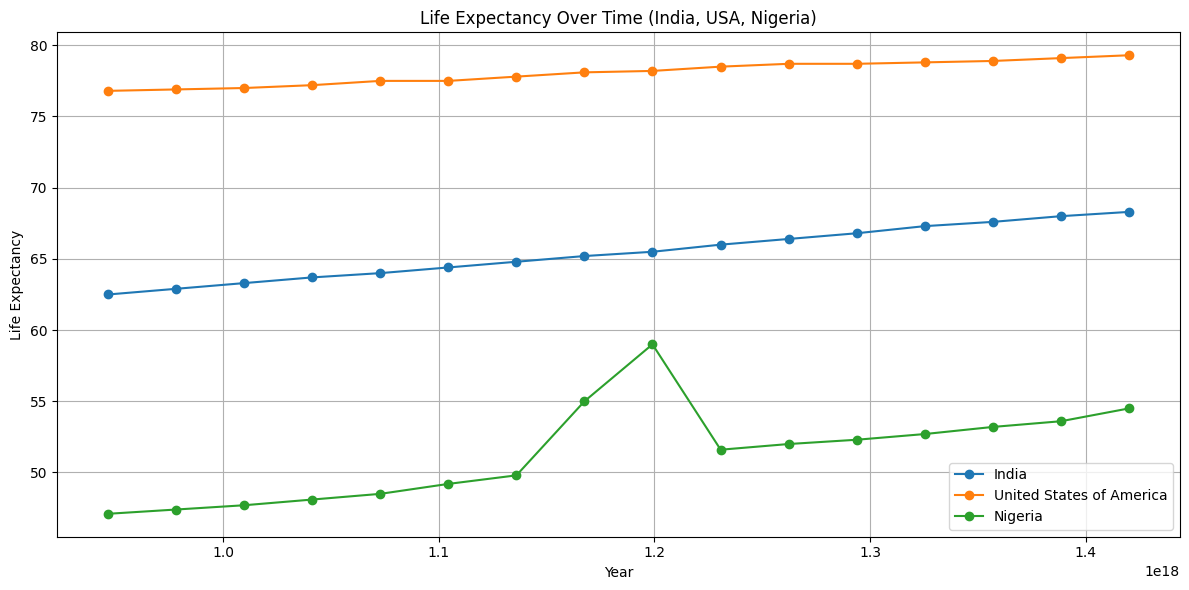

In [63]:
selected_countries = ['India', 'United States of America', 'Nigeria']

df['Life_expectancy'] = df['Life expectancy'].astype(float)
df['Year'] = df['Year'].astype(int)

df_selected = df[df['Country'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_selected[df_selected['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life_expectancy'], marker='o', label=country)

plt.title('Life Expectancy Over Time (India, USA, Nigeria)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Q17. Area Plot of Healthcare Indicators by Year

To analyze trends in global healthcare efforts, we created an area plot for the average yearly values of four key health indicators:

- **Hepatitis B** vaccination coverage
- **Measles** cases
- **Polio** vaccination coverage
- **Diphtheria** vaccination coverage

This area plot illustrates how these indicators have evolved globally over time, helping visualize progress in disease prevention and vaccination coverage.


<Figure size 1200x600 with 0 Axes>

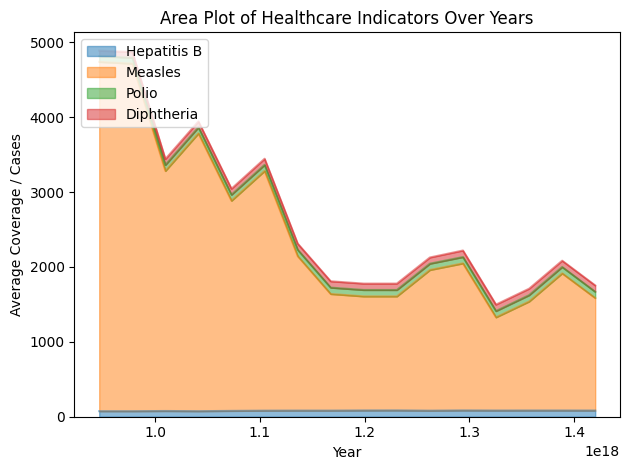

In [64]:
health_indicators = ['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']

health_data = df.groupby('Year')[health_indicators].mean()

plt.figure(figsize=(12, 6))
health_data.plot.area(alpha=0.5)
plt.title('Area Plot of Healthcare Indicators Over Years')
plt.xlabel('Year')
plt.ylabel('Average Coverage / Cases')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



## 6. Visualization 3: Correlation & Advanced


### Q18. Correlation Heatmap of Numeric Features

To uncover relationships between key quantitative features, we created a correlation heatmap of all numeric columns. This visualization:

- Shows how strongly features are linearly related.
- Highlights positive correlations (close to +1) and negative correlations (close to -1).
- Helps identify patterns, such as the relationship between **GDP**, **life expectancy**, **schooling**, and **health indicators**.

This analysis is useful for selecting variables for modeling and understanding data structure.



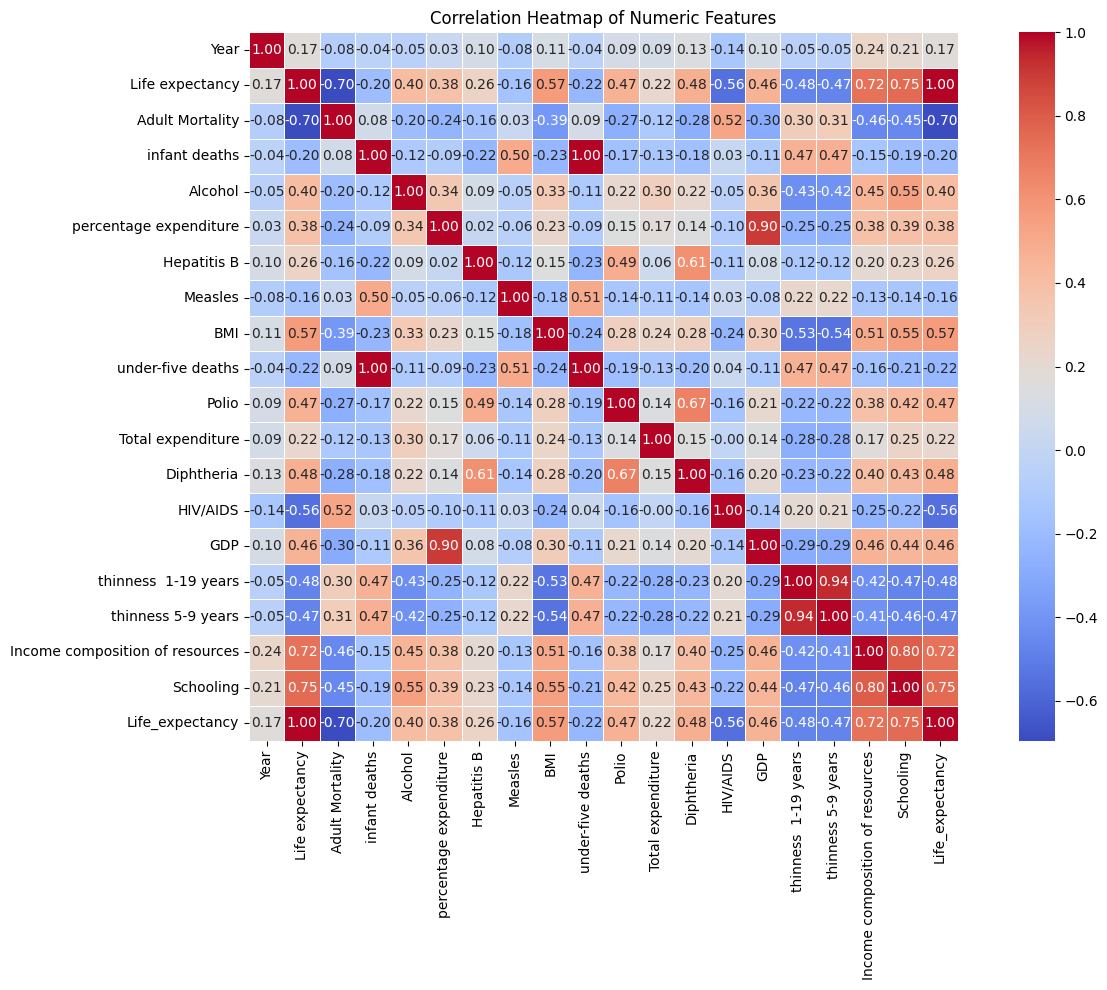

In [65]:
numeric_df = df.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



### Q19. GDP vs Life Expectancy (Colored by Development Status)

This scatter plot explores the relationship between a country's **GDP** and **life expectancy**, with color coding based on development status:

- Each point represents a country in a specific year.
- Countries are categorized as either **Developed** or **Developing**.
- The plot reveals a positive trend: higher GDP levels are generally associated with longer life expectancy.

This visualization helps illustrate global health and wealth disparities across countries.



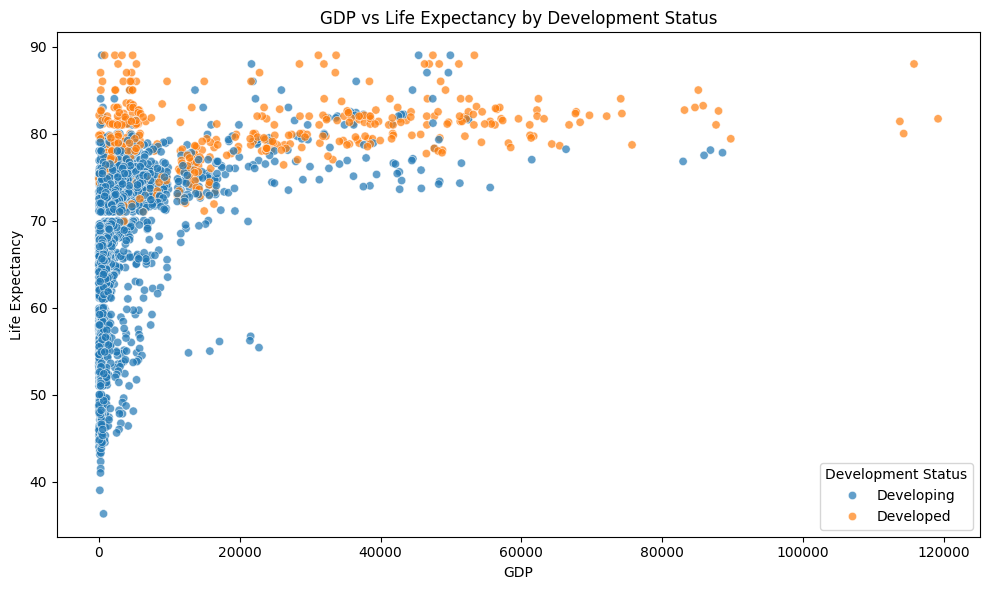

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy', hue='Status', alpha=0.7)

plt.title('GDP vs Life Expectancy by Development Status')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.legend(title='Development Status')
plt.tight_layout()
plt.show()



### Q20. Pair Plot of Selected Indicators

To examine pairwise relationships between key health and economic variables, we created a **pair plot** for:

- **Life Expectancy**
- **BMI**
- **Schooling**
- **GDP**

This plot displays both scatter plots and distribution histograms, helping reveal:

- Positive correlations between **life expectancy**, **schooling**, and **BMI**.
- A looser but still positive trend between **GDP** and other indicators.

This visualization is useful for spotting linear and non-linear associations and possible clusters.



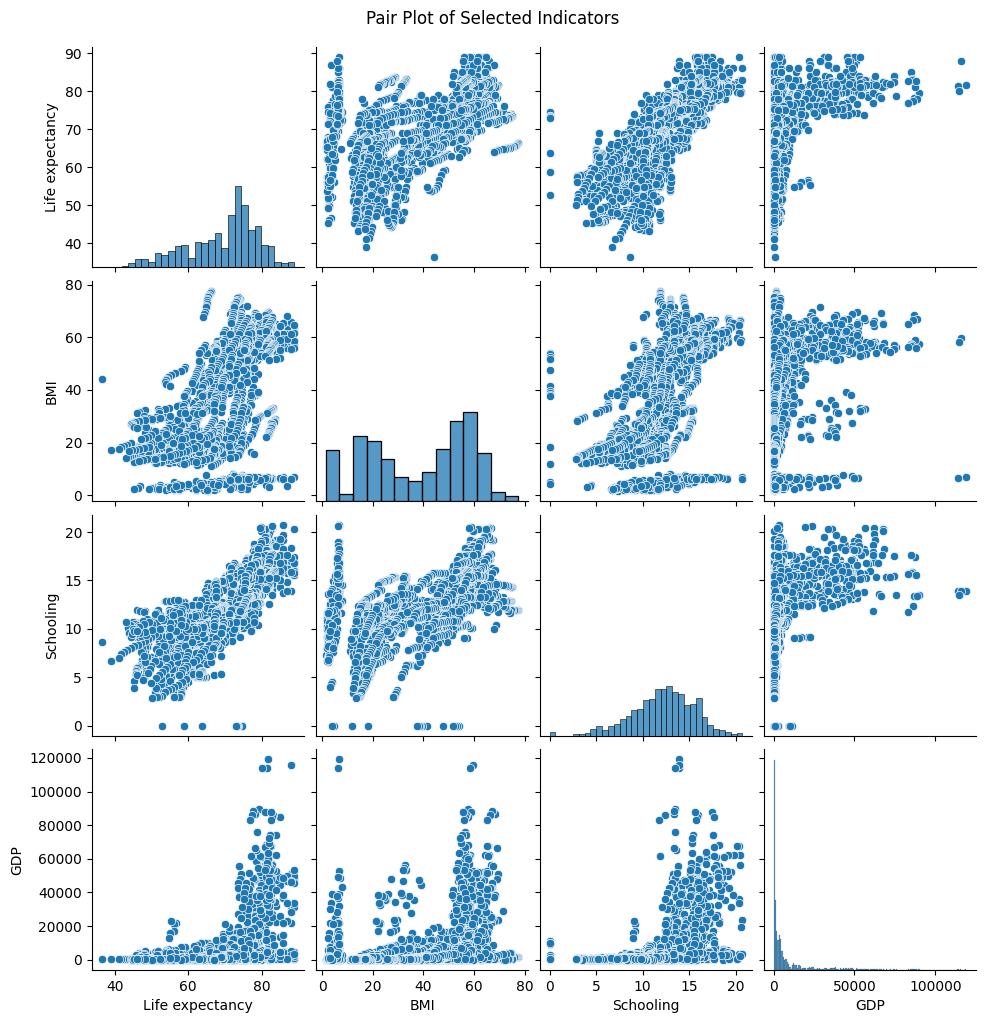

In [67]:
columns = ['Life expectancy', 'BMI', 'Schooling', 'GDP']

sns.pairplot(df[columns].dropna())
plt.suptitle('Pair Plot of Selected Indicators', y=1.02)
plt.show()



## 7. Statistics


### Q21. Correlation between GDP and Life Expectancy

We calculated both **Pearson** and **Spearman** correlation coefficients to measure the association between **GDP** and **Life Expectancy**:

- **Pearson correlation** captures the linear relationship.
- **Spearman correlation** assesses the monotonic (rank-based) relationship.

The results show a moderate positive association, with Spearman's coefficient higher, indicating a stronger monotonic relationship even if it's not strictly linear.


In [68]:
gdp_life = df[['GDP', 'Life expectancy']].dropna()

pearson_corr = gdp_life.corr(method='pearson').iloc[0, 1]
spearman_corr = gdp_life.corr(method='spearman').iloc[0, 1]

print(f"Pearson correlation: {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


Pearson correlation: 0.4619
Spearman correlation: 0.6435


### Q22. T-test: Life Expectancy Between Developed and Developing Countries
To determine whether there is a statistically significant difference in life expectancy between developed and developing countries, we conducted a two-sample **Welch's T-test**, which does not assume equal variances.

**Interpretation:**
- A very small p-value (< 0.05) indicates that the difference in mean life expectancy between the two groups is statistically significant.
- The high T-statistic and near-zero p-value show that developed countries have significantly higher life expectancy on average.


In [69]:
from scipy.stats import ttest_ind

developed = df[df['Status'] == 'Developed']['Life expectancy'].dropna()
developing = df[df['Status'] == 'Developing']['Life expectancy'].dropna()

t_stat, p_val = ttest_ind(developed, developing, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")



T-statistic: 47.8684
P-value: 0.0000


### Q23. **ANOVA test for life expectancy differences between WHO regions**

The goal is to determine whether there are significant differences in **life expectancy** across different **WHO regions** using a one-way ANOVA test.

The original dataset does **not** include WHO regional classification, so data enrichment was required.

---

**My Approach:**

1. **Load main dataset:**  
   I downloaded and loaded the main life expectancy dataset from Kaggle using the `kagglehub` library.

2. **Load WHO regions mapping:**  
   Since the main dataset lacks WHO regional info, I uploaded an external Excel file (`who-regions.xlsx`) containing the mapping of countries to their WHO regions, and loaded it with `pandas.read_excel`.

3. **Merge datasets:**  
   I merged the main dataset with the WHO regions data on the `Country` column using a left join, preserving all original rows and enriching them with regional info.

4. **Data cleaning for ANOVA:**  
   I filtered out rows with missing values in either `Region` or `Life expectancy` columns to ensure valid statistical analysis.

5. **ANOVA test:**  
   I grouped the data by `Region` and extracted life expectancy values per group. Then I performed a one-way ANOVA test using `scipy.stats.f_oneway` to assess if mean life expectancy differs significantly between WHO regions.




In [70]:
import os

path_regions = kagglehub.dataset_download("elainechen7366/who-regions-and-countries-list")

df_regions = pd.read_excel(os.path.join(path_regions, "WHO Country Region List.xlsx"))

print("WHO region and country data loaded successfully.")
print("\n--- Sample of the WHO regions dataset (df_regions) ---")
print(df_regions.head())


WHO region and country data loaded successfully.

--- Sample of the WHO regions dataset (df_regions) ---
       Country Region IncomeGroupCountry
0  Afghanistan    EMR                Low
1      Albania    EUR       Upper middle
2      Algeria    AFR       Lower middle
3      Andorra    EUR               High
4       Angola    AFR       Lower middle


In [72]:
from scipy.stats import f_oneway


# Merge life expectancy data with WHO regions on the "Country" column
df_merged = pd.merge(df, df_regions, on='Country', how='left')

# Drop rows with missing values in relevant columns for analysis
df_anova = df_merged.dropna(subset=['Region', 'Life expectancy'])

# Group life expectancy values by WHO region
groups = [group['Life expectancy'].values for name, group in df_anova.groupby('Region')]

# Perform one-way ANOVA test
f_stat, p_val = f_oneway(*groups)

# Display ANOVA test results
print("--- ANOVA Test Results ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpret results
if p_val < 0.05:
    print("\nStatistically significant: There is a meaningful difference in life expectancy across regions.")
else:
    print("\nNot statistically significant: No meaningful difference in life expectancy across regions.")


--- ANOVA Test Results ---
F-statistic: 726.1153
P-value: 0.0000

Statistically significant: There is a meaningful difference in life expectancy across regions.


### Interpretation of ANOVA Test Results

The ANOVA test produced the following results:

- **F-statistic:** 726.1153  
- **P-value:** 0.0000 (approximately zero)

---

**What does this mean?**

The F-statistic measures the ratio of variance **between** the WHO regions to the variance **within** each region. A large F-statistic indicates that the differences in mean life expectancy between regions are much greater than the variability within regions.

The p-value represents the probability that these observed differences occurred by chance, assuming there is actually no difference (null hypothesis).

Since the p-value is effectively zero (much less than the common significance threshold of 0.05), we reject the null hypothesis.

---

**Conclusion:**

There is a statistically significant difference in mean life expectancy between the different WHO regions. In other words, life expectancy varies meaningfully across these regions, and this variation is unlikely to be due to random chance.

---

This result highlights regional disparities in health outcomes, which could be influenced by various socioeconomic, environmental, and healthcare-related factors.


### Q24. Interpretation of the Linear Regression Model

I built a linear regression model to predict **life expectancy** based on three predictors: **Schooling**, **GDP**, and **BMI**. The model output includes:

- **Coefficients:**  
  These values show the expected change in life expectancy for a one-unit increase in each predictor, holding others constant.  
  For example, a positive coefficient for *Schooling* suggests that more years of schooling are associated with higher life expectancy.

- **Intercept:**  
  The predicted life expectancy when all predictors are zero. This serves as the baseline level of life expectancy in the model.

- **Mean Squared Error (MSE):**  
  Measures the average squared difference between observed and predicted values. Lower values indicate better prediction accuracy.

- **R² Score:**  
  Represents the proportion of variance in life expectancy explained by the model. Values close to 1 indicate strong explanatory power.

---

**Summary:**  
The regression model quantifies how schooling, GDP, and BMI each contribute to predicting life expectancy. Evaluation metrics (MSE and R²) provide insight into the model's fit and reliability.


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cols = ['Life expectancy', 'Schooling', 'GDP', 'BMI']
df_model = df[cols].dropna()

X = df_model[['Schooling', 'GDP', 'BMI']]
y = df_model['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Coefficients: [1.62563335e+00 9.15389238e-05 9.95064448e-02]
Intercept: 45.23438487598449
Mean Squared Error: 33.25
R^2 Score: 0.64


## This project analyzed global life expectancy and related health and economic indicators using a comprehensive dataset.

Key activities included:

- **Data cleaning and preprocessing** to ensure data quality and consistency.
- **Exploratory data analysis** through visualizations like histograms, line plots, scatter plots, and heatmaps to identify patterns and relationships.
- **Statistical testing** including correlation analysis, t-tests, and ANOVA to validate differences and associations.
- **Predictive modeling** using linear regression to quantify the influence of schooling, GDP, and BMI on life expectancy.

**Conclusions:**

- Life expectancy generally correlates positively with economic indicators such as GDP and schooling.
- Significant differences in life expectancy exist between developed and developing countries.
- Vaccination coverage and disease prevalence trends vary globally, affecting health outcomes.
- The regression model demonstrates that education, economic prosperity, and health status significantly contribute to explaining life expectancy variance.

This analysis provides insights into global health disparities and highlights important factors for improving population health outcomes.

---

Thank you for reviewing this project.